<a href="https://colab.research.google.com/github/AlvimDePaula/Maos_a_obra_Aprendizado_de_Maquina/blob/main/capitulo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/content/sample_data

In [ ]:
# dataset
dataset = pd.read_csv("/content/drive/MyDrive/Programação/LIVRO O'REILLY/2º CAPITULO/housing.csv")

In [ ]:
# 5 primeiras linhas
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
# Informações superficial do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- Uma variavel target;
- Oito variavel numericas;
- Uma variavel categorica;

In [ ]:
# Valores da variavel categorica
dataset['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
# Medida de Tendência Central
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


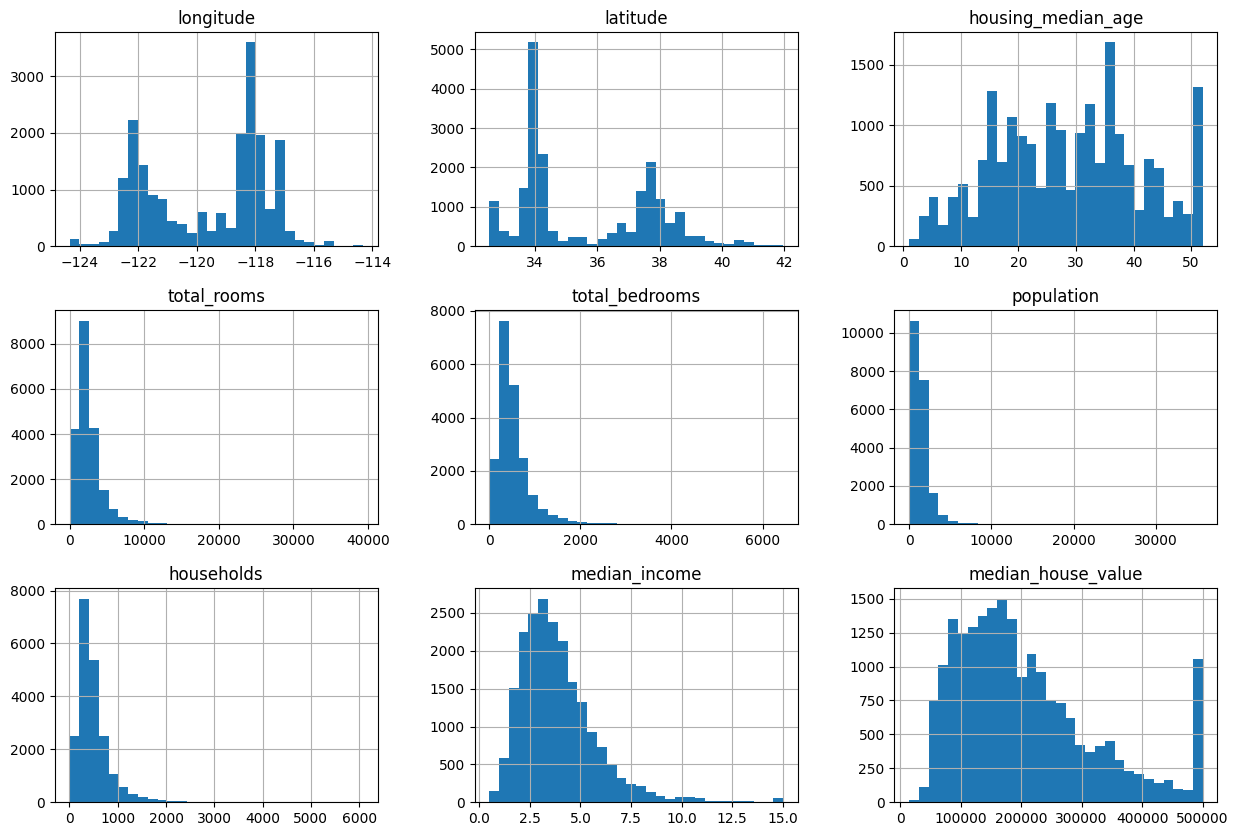

In [ ]:
# Histograma
dataset.hist(bins=30, figsize=(15,10));

In [ ]:
# Separando dados de treino e teste

train_set, test_set = train_test_split(dataset,
                                       test_size=.2,
                                       random_state=14)

In [ ]:
# Estratificando a variavel renda média

dataset['income_cat'] = round(dataset['median_income'] / 1.5) #Apenas para diminuir quantidade de categorias
dataset['income_cat'].where(dataset['income_cat'] < 5, 5.0, inplace=True) # Primeiro vem a condição e depois tudo que for "False" recebe o valor de 5

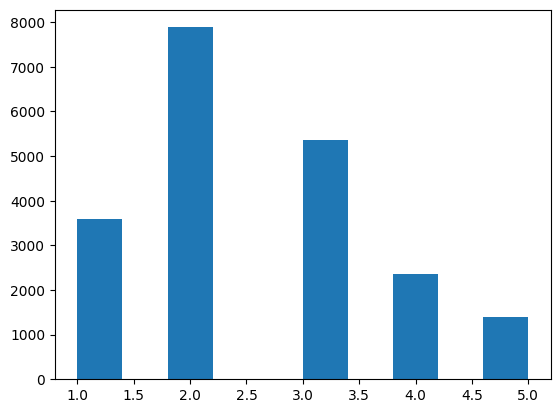

In [ ]:
# Histograma
plt.hist(dataset['income_cat'], range=(1,5));

In [ ]:
# Embaralhando os dados
split = StratifiedShuffleSplit(n_splits=1, test_size=.2, random_state = 14)
for train_index, test_index in split.split(dataset, dataset['income_cat']):
  strat_train_set = dataset.loc[train_index]
  strat_test_set = dataset.loc[test_index]
  print(train_index)

[ 1431  7155 16173 ... 19251  2006  3519]


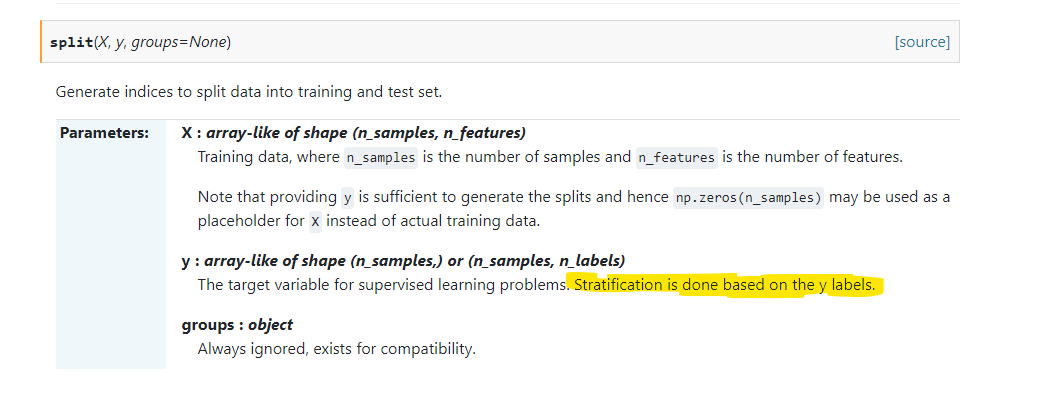

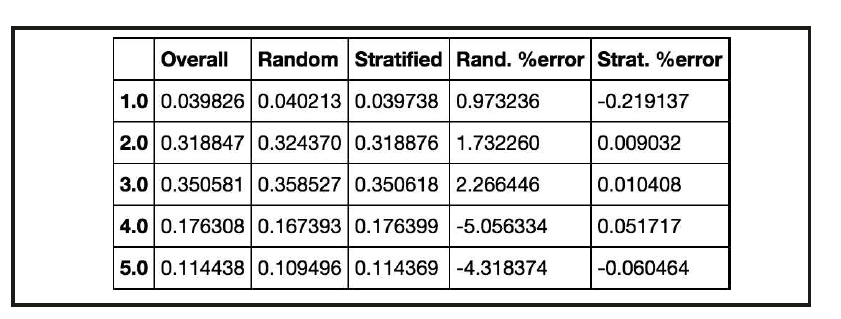

In [ ]:
# Retirando antiga variável median income
strat_test_set.drop('income_cat', axis=1, inplace=True)
strat_train_set.drop('income_cat', axis=1, inplace=True)

In [ ]:
# Cópia para nao alterar os dados originais
housing = strat_train_set.copy()

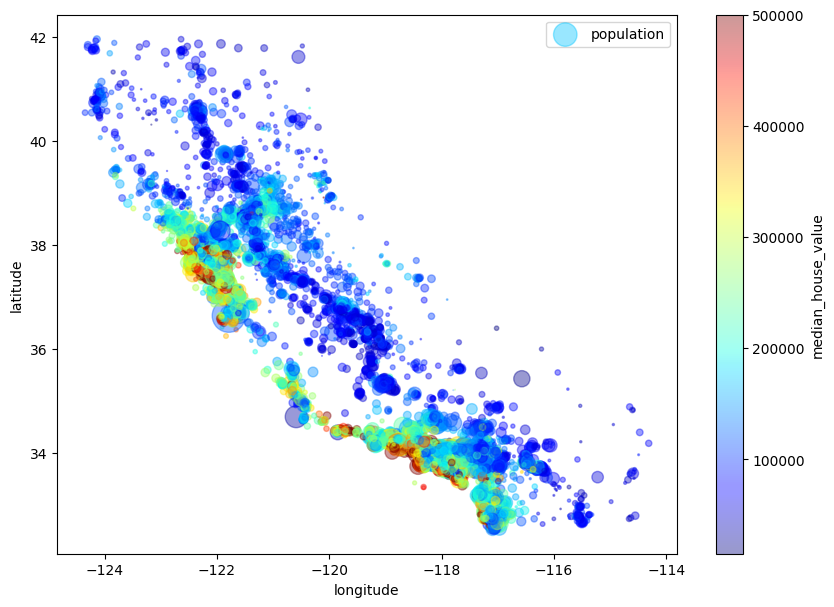

In [ ]:
# Mapa de média de valor da casas e da população em relação a localização das casas
housing.plot.scatter(x='longitude', y='latitude', alpha=.4, s=housing['population']/50, label='population', figsize=(10,7),
                     c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend();

In [ ]:
# Matrix de correlação da váriavel Média de Valores da Casas
corr_matrix = housing.corr(method='pearson')
corr_matrix['median_house_value'].sort_values(ascending=False)

<ipython-input-20-3a55b5b29b62>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr(method='pearson')


median_house_value    1.000000
median_income         0.687681
total_rooms           0.131778
housing_median_age    0.105679
households            0.062547
total_bedrooms        0.046885
population           -0.025269
longitude            -0.039707
latitude             -0.148664
Name: median_house_value, dtype: float64

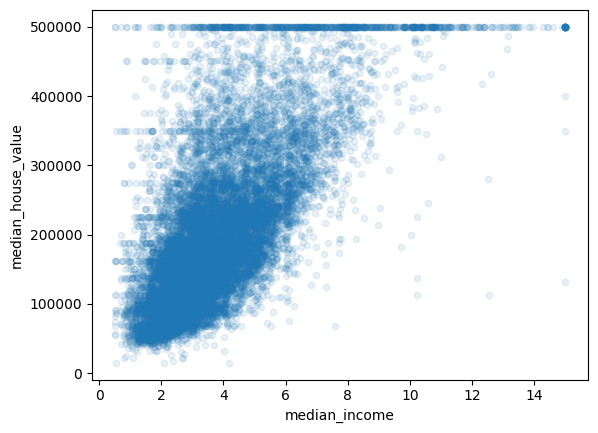

In [ ]:
# Gráfico median income x median_house_value
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=.1); # alpha muda transparência dos pontos
# É notável um limite nos valores de median house value = 500000 e linhas em valores específicos

In [ ]:
# Criando novas váriaveis a partir dos que já estão no dataset, para se olhar novos valores de correlação
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [ ]:
# Nova matrix de correlação da váriavel Média de Valores da Casas
corr_matrix = housing.corr(method='pearson')
corr_matrix['median_house_value'].sort_values(ascending=False)

<ipython-input-23-a6cc714e75ea>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr(method='pearson')


median_house_value          1.000000
median_income               0.687681
rooms_per_household         0.149309
total_rooms                 0.131778
housing_median_age          0.105679
households                  0.062547
total_bedrooms              0.046885
population_per_household   -0.022248
population                 -0.025269
longitude                  -0.039707
latitude                   -0.148664
bedrooms_per_room          -0.255346
Name: median_house_value, dtype: float64

Diferença entre as matriz de correlação:

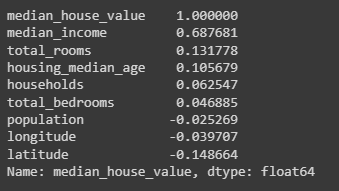

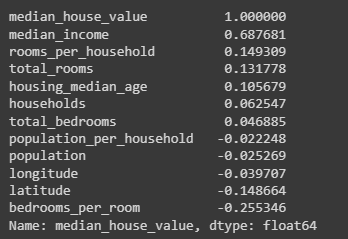

# LIMPEZA DE DADOS

In [ ]:
# Separando x e y
housing_numerico = strat_train_set.dropna(subset=['total_bedrooms']).drop(['median_house_value', 'ocean_proximity'], axis=1).reset_index(drop=True) # x
housing_categorico = strat_train_set.dropna(subset=['total_bedrooms'])['ocean_proximity'].reset_index(drop=True)
housing_labels = strat_train_set.dropna(subset=['total_bedrooms'])['median_house_value'].reset_index(drop=True) # y

# TRANSFORMAÇÃO DOS DADOS

In [ ]:
# Padronização dos dados

# Instaciando
std = StandardScaler()

# Treinando e transformando
housing_std = std.fit_transform(housing_numerico)

# Dados Padronizados
housing_total = pd.DataFrame(data=housing_std, columns=housing_numerico.columns)
housing_total.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-1.226730,1.102009,0.500075,0.208342,-0.005334,0.166626,0.169799,0.542901
1,0.710874,-0.745903,0.816988,-0.698430,-0.650005,-0.569336,-0.600362,-0.048157
2,-1.421489,0.975696,1.054673,0.713311,1.378120,1.888615,1.277067,-1.385618
3,1.185287,-1.335363,0.737760,0.008798,-0.097094,-0.262314,-0.011721,0.070971
4,-0.068163,-0.572807,0.183162,-0.727842,-0.518248,-0.382453,-0.499230,-0.640689


In [ ]:
# One hot enconder na váriavel OCEAN PROXIMITY
housing_cat_encoded, housing_categories = housing_categorico.factorize()

# Instanciando
encoder = OneHotEncoder()

# Transformando
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))

print(housing_cat_encoded, '\n\n' ,housing_categories, '\n\n' ,housing_cat_1hot.toarray())

[0 1 0 ... 1 3 1] 

 Index(['NEAR BAY', '<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'ISLAND'], dtype='object') 

 [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]]


In [ ]:
# Dataframe do one hot encoder
df_cat = pd.DataFrame(housing_cat_1hot.toarray(), columns=housing_categories)
df_cat.head()

,NEAR BAY,<1H OCEAN,NEAR OCEAN,INLAND,ISLAND
0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0


In [ ]:
# Juntando dois datas frames
housing_2 = pd.concat([housing_total, df_cat], axis=1)
housing_2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,NEAR BAY,<1H OCEAN,NEAR OCEAN,INLAND,ISLAND
0,-1.226730,1.102009,0.500075,0.208342,-0.005334,0.166626,0.169799,0.542901,1.0,0.0,0.0,0.0,0.0
1,0.710874,-0.745903,0.816988,-0.698430,-0.650005,-0.569336,-0.600362,-0.048157,0.0,1.0,0.0,0.0,0.0
2,-1.421489,0.975696,1.054673,0.713311,1.378120,1.888615,1.277067,-1.385618,1.0,0.0,0.0,0.0,0.0
3,1.185287,-1.335363,0.737760,0.008798,-0.097094,-0.262314,-0.011721,0.070971,0.0,0.0,1.0,0.0,0.0
4,-0.068163,-0.572807,0.183162,-0.727842,-0.518248,-0.382453,-0.499230,-0.640689,0.0,0.0,1.0,0.0,0.0


# MODELOS

## Regressão Linear

In [ ]:
# Instanciando
lin_reg = LinearRegression()

# Treinamento
lin_reg.fit(housing_2, housing_labels)

# Validação cruzada
scores = cross_val_score(estimator=lin_reg, X=housing_2, y=housing_labels, scoring="neg_mean_squared_error", cv=5) # Sklearn espera uma função de utilidade (mais alta é melhor)
lin_rmse_scores = np.sqrt(-scores)                                                                                # ao invés de uma função de custo(mais baixa é melhor) então é
                                                                                                                   # só inverter (-scores)

print("Scores: ", lin_rmse_scores, '\n\n', "Média: ", lin_rmse_scores.mean(), '\n\n' ,"Desvio Padrão: ", lin_rmse_scores.std())

Scores:  [68516.93132717 69680.15474249 69152.07265902 67574.24850556
 68667.86929973] 

 Média:  68718.255306791 

 Desvio Padrão:  702.1779938498779


## Árvore de Decisão

In [ ]:
# Instanciando
tree = DecisionTreeRegressor()

# Treinamento
tree.fit(housing_2, housing_labels)

# Validação cruzada
scores_tree = cross_val_score(estimator=tree, X=housing_2, y=housing_labels, scoring="neg_mean_squared_error", cv=10) # Sklearn espera uma função de utilidade (mais alta é melhor)
tree_rmse_scores = np.sqrt(-scores_tree)                                                                              # ao invés de uma função de custo(mais baixa é melhor) então é
                                                                                                                      # só inverter (-scores)

print("Scores: ", tree_rmse_scores, '\n\n', "Média: ", tree_rmse_scores.mean(), '\n\n' ,"Desvio Padrão: ", tree_rmse_scores.std())

Scores:  [71488.92986934 64070.54721723 73262.16286817 67756.59145317
 70839.93259357 71135.66870324 66004.37749691 67835.38748971
 68032.07620457 68374.73970005] 

 Média:  68880.04135959521 

 Desvio Padrão:  2639.4470853320536


## Random Forest

In [ ]:
# Instanciando
rf = RandomForestRegressor()

# Treinamento
rf.fit(housing_2, housing_labels)

# Validação cruzada
scores_rf = cross_val_score(estimator=rf, X=housing_2, y=housing_labels, scoring='neg_mean_squared_error', cv=10)
rf_rmse_scores = np.sqrt(-scores_rf)


print("Scores: ", rf_rmse_scores, '\n\n', "Média: ", rf_rmse_scores.mean(), '\n\n' ,"Desvio Padrão: ", rf_rmse_scores.std())

Scores:  [52851.47048169 45869.56864545 54102.55095137 47423.10728147
 47995.75056905 50505.30025868 47293.76677262 47032.80258627
 51147.49782452 48261.45878593] 

 Média:  49248.32741570412 

 Desvio Padrão:  2602.9235572790567


In [ ]:
# lista de parametros a serem testados
param_grid = [
    {'n_estimators': [3, 10, 30, 100],
    'max_features': [2, 4, 6, 8],
    'bootstrap': [True, False]}
]

# Instanciando-grid
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Treinamento
grid_search.fit(housing_2, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [True, False],
                          'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30, 100]}],
             scoring='neg_mean_squared_error')

In [ ]:
# Melhores Parametros
grid_search.best_params_

{'bootstrap': False, 'max_features': 6, 'n_estimators': 100}

### Melhor modelo de Random Forest encontrado utilizando o grid search

In [ ]:
# Instanciando
rf_final = RandomForestRegressor(max_features=6, n_estimators=100, bootstrap=False)

# Treinamento
rf_final.fit(housing_2, housing_labels)

# Validação cruzada
scores_rf = cross_val_score(estimator=rf_final, X=housing_2, y=housing_labels, scoring='neg_mean_squared_error', cv=10)
rf_rmse_scores = np.sqrt(-scores_rf)


print("Scores: ", rf_rmse_scores, '\n\n', "Média: ", rf_rmse_scores.mean(), '\n\n' ,"Desvio Padrão: ", rf_rmse_scores.std())

Scores:  [52194.92486152 45689.81371525 53343.2946023  45986.77132179
 47221.81545239 50578.12904471 45853.81902745 47021.49770341
 50305.84221064 47748.72269921] 

 Média:  48594.463063865944 

 Desvio Padrão:  2649.5340626919356


# Exercício capitulo 2

In [ ]:
from sklearn.svm import SVR

param_svr = [
    {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
     'gamma':['scale', 'auto']
    }
]

svr_model = SVR()

grid_search_svr = GridSearchCV(estimator=svr_model, param_grid=param_svr, cv=5, scoring='neg_mean_squared_error')

grid_search_svr.fit(housing_2, housing_labels)

grid_search_svr.best_params_

{'gamma': 'scale', 'kernel': 'linear'}

In [ ]:
# Instanciando
svr_final = SVR(gamma='scale', kernel='linear')

# Treinamento
svr_final.fit(housing_2, housing_labels)

# Validação cruzada
scores_svr = cross_val_score(estimator=svr_final, X=housing_2, y=housing_labels, scoring='neg_mean_squared_error', cv=10)
svr_rmse_scores = np.sqrt(-scores_svr)


print("Scores: ", svr_rmse_scores, '\n\n', "Média: ", svr_rmse_scores.mean(), '\n\n' ,"Desvio Padrão: ", svr_rmse_scores.std())

Scores:  [114113.538493   109045.54268628 113692.65227214 110096.38404639
 112819.44086573 111548.22069475 115587.0061345  112397.18715566
 110625.06947539 111469.47509148] 

 Média:  112139.45169153289 

 Desvio Padrão:  1885.79081011811
